In [68]:
%run __init__.py
from basic.scripts.cifar10.model_function import get_estimator
from basic.scripts.cifar10.utils import bytes_feature, int64_feature
from basic.scripts.cifar10.config import RunConfig
import tensorflow as tf

In [69]:
# The directory where the input data is stored
data_dir = '/home/jdavidagudelo/Documents/data_sets/minist/'
# The directory where the model will be stored
job_dir = '/home/jdavidagudelo/Documents/data_sets/minist/model/'
# Where to locate variable operations
variable_strategy = 'CPU'
# For usage with GPUs
num_gpus = 0
# Number of layers of the model
num_layers = 44
train_steps = 10000
train_batch_size = 128
eval_batch_size = 100
# Momentum for momentum optimizer
momentum = 0.9
# weight decay for convolution
weight_decay = 2e-4

learning_rate = 0.1
use_distortion_for_training = False
sync = False
num_intra_threads = 0
num_inter_threads = 0
data_format = None
log_device_placement = False
batch_norm_decay = 0.997
batch_norm_epsilon = 1e-5
kwargs = {
    'data_dir': data_dir,
    'job_dir': job_dir, 'variable_strategy': variable_strategy, 'num_gpus': num_gpus,
    'num_layers': num_layers, 'train_steps': train_steps, 'train_batch_size': train_batch_size,
    'eval_batch_size': eval_batch_size, 'momentum': momentum, 'weight_decay': weight_decay,
    'learning_rate': learning_rate, 'use_distortion_for_training': use_distortion_for_training,
    'sync': sync, 'num_intra_threads': num_intra_threads, 'num_inter_threads': num_inter_threads,
    'data_format': data_format, 'log_device_placement': log_device_placement, 
    'batch_norm_decay': batch_norm_decay, 'batch_norm_epsilon': batch_norm_epsilon
}
sess_config = tf.ConfigProto(
        allow_soft_placement=True,
        log_device_placement=log_device_placement,
        intra_op_parallelism_threads=num_intra_threads,
        gpu_options=tf.GPUOptions(force_gpu_compatible=True))

config = RunConfig(
        session_config=sess_config, model_dir=job_dir)
estimator, _, _ = get_estimator(data_dir=data_dir, num_gpus=num_gpus, variable_strategy=variable_strategy, 
              run_config=config, hparams=tf.contrib.training.HParams(is_chief=config.is_chief, **kwargs),
             use_distortion_for_training=False)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2884417940>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': gpu_options {
  force_gpu_compatible: true
}
allow_soft_placement: true
, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/home/jdavidagudelo/Documents/data_sets/minist/model/'}


DAMN


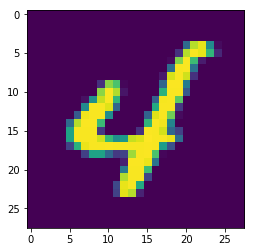

In [70]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/home/jdavidagudelo/Documents/data_sets/minist/Images/train/15.png', flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print('DAMN')

In [71]:
result = estimator.predict()

TypeError: predict() missing 1 required positional argument: 'input_fn'

In [72]:
result

<bound method Estimator.predict of <tensorflow.python.estimator.estimator.Estimator object at 0x7f28a47212b0>>

In [73]:
example = tf.train.Example(features=tf.train.Features(
    feature={
        'image': bytes_feature(img.tobytes()),
        'label': int64_feature(4)
    }))

In [74]:
def input_fn():
    return [example], []

In [75]:
p = estimator.predict(input_fn=input_fn)

In [76]:
import numpy as np
np.array(list(p for p in p))

INFO:tensorflow:Calling model_fn.


TypeError: 'NoneType' object is not subscriptable